In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',
                  names = [
                      'Age_of_patient',
                      'year of operation',
                      'positive_axillary_nodes',
                      'Survival_status'
                  ]
)

In [3]:
data.head()

,Age_of_patient,year of operation,positive_axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
print(data.shape)

(306, 4)


In [5]:
X = data.drop('Survival_status', axis = 1)
y = data['Survival_status']

In [8]:
#Normalizasyon
from sklearn.preprocessing import MinMaxScaler

prcs = MinMaxScaler(feature_range = (0, 1))
X = prcs.fit_transform(X)

In [9]:
X.shape[1]

3

In [10]:
feature_adedi = X.shape[1]
giris_boyutu = Input(shape = (feature_adedi))

bottleneck_shape = 2

kodlayici = Dense(3, activation = 'relu')(giris_boyutu)
kodlayici = Dense(3, activation = 'relu')(giris_boyutu)

kodlayici = Dense(bottleneck_shape, activation = 'relu')(kodlayici)

kod_cozucu = Dense(3, activation = 'relu')(kodlayici)
kod_cozucu = Dense(feature_adedi, activation = 'sigmoid')(kodlayici)

otokodlayici = Model(inputs = giris_boyutu, outputs = kod_cozucu)

In [11]:
import tensorflow as tf
tf.keras.utils.plot_model(otokodlayici, 'haberman.jpg', show_shapes = True, show_layer_names = True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [12]:
otokodlayici.compile(
        loss = 'mse',
        optimizer = 'adam',
)

history = otokodlayici.fit(
        X,
        X,
        epochs = 100,
        batch_size = 16,
        verbose = 2,
        validation_split = 0.2
)


Epoch 1/100
16/16 - 2s - loss: 0.1089 - val_loss: 0.1197 - 2s/epoch - 132ms/step
Epoch 2/100
16/16 - 0s - loss: 0.1073 - val_loss: 0.1190 - 43ms/epoch - 3ms/step
Epoch 3/100
16/16 - 0s - loss: 0.1058 - val_loss: 0.1184 - 40ms/epoch - 2ms/step
Epoch 4/100
16/16 - 0s - loss: 0.1043 - val_loss: 0.1178 - 43ms/epoch - 3ms/step
Epoch 5/100
16/16 - 0s - loss: 0.1028 - val_loss: 0.1172 - 44ms/epoch - 3ms/step
Epoch 6/100
16/16 - 0s - loss: 0.1014 - val_loss: 0.1166 - 41ms/epoch - 3ms/step
Epoch 7/100
16/16 - 0s - loss: 0.1000 - val_loss: 0.1161 - 41ms/epoch - 3ms/step
Epoch 8/100
16/16 - 0s - loss: 0.0986 - val_loss: 0.1156 - 39ms/epoch - 2ms/step
Epoch 9/100
16/16 - 0s - loss: 0.0973 - val_loss: 0.1151 - 47ms/epoch - 3ms/step
Epoch 10/100
16/16 - 0s - loss: 0.0960 - val_loss: 0.1146 - 38ms/epoch - 2ms/step
Epoch 11/100
16/16 - 0s - loss: 0.0947 - val_loss: 0.1141 - 39ms/epoch - 2ms/step
Epoch 12/100
16/16 - 0s - loss: 0.0935 - val_loss: 0.1136 - 43ms/epoch - 3ms/step
Epoch 13/100
16/16 - 0s -

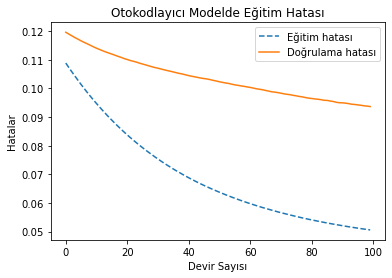

In [13]:
plt.plot(history.history['loss'], '--')
plt.plot(history.history['val_loss'])
plt.title('Otokodlayıcı Modelde Eğitim Hatası')
plt.ylabel('Hatalar')
plt.xlabel('Devir Sayısı')
plt.legend(['Eğitim hatası','Doğrulama hatası'], loc = 'upper right')
plt.show()

D:\anaconda3\lib\site-packages\numpy\core\_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


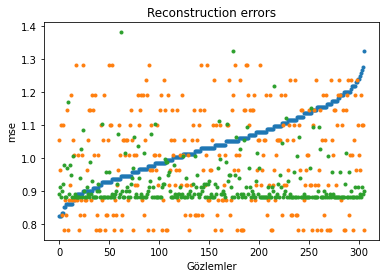

In [18]:
estimates = otokodlayici.predict(X)
mse = np.mean((X - estimates, 2), axis = 0)

plt.plot(mse, linewidth = 0, marker = '.')
plt.title('Reconstruction errors')
plt.ylabel('mse')
plt.xlabel('Gözlemler')
plt.show()

In [19]:
print("\n Eşik değeri giriniz: \n")
eşik = float(input())


 Eşik değeri giriniz: 

1.2


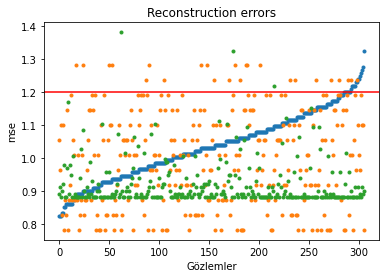

In [22]:
plt.close()
plt.plot(mse, linewidth = 0, marker = '.')
plt.title('Reconstruction errors')
plt.ylabel('mse')
plt.xlabel('Gözlemler')
plt.axhline(y = eşik, color = 'r')
plt.show()

In [23]:
anormal = pd.DataFrame(data[mse > eşik])
print('Anormal değerlerin sayısı', anormal.shape)

Anormal değerlerin sayısı (48, 4)


In [24]:
print('Anormal değerler : \n', anormal)

Anormal değerler : 
      Age_of_patient  year of operation  positive_axillary_nodes  \
17               36                 69                        0   
24               38                 69                       21   
50               41                 69                        8   
53               42                 69                        1   
62               43                 58                       52   
87               45                 68                        0   
90               46                 69                        3   
105              47                 68                        4   
142              52                 69                        3   
148              52                 69                        0   
155              52                 68                        0   
170              54                 68                        7   
174              54                 67                       46   
176              54                 69   

In [30]:
anormal_yok = pd.DataFrame(data[mse <= eşik])
print ('Önceki veri : ', X.shape)

Önceki veri :  (306, 3)


In [31]:
print('Yeni veri :', anormal_yok.shape)

Yeni veri : (870, 4)


In [32]:
çıkış = pd.DataFrame(anormal_yok)
çıkış.to_csv('haberman_yeni.csv', index = False)